In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# import data from csv
lab03data = pd.read_csv('Lab_3_Raw_Data.csv', header=None, skiprows=2)  
lab03data_df = pd.DataFrame(lab03data)

# 5) Determine ey, ex, and gamma_xy

In [4]:
# store relevant data as numpy arrays
# ey (ch 2)
ey_al_bend_123 = np.asarray(lab03data_df[2][0:], dtype=float)
ey_al_bend_456 = np.asarray(lab03data_df[7][0:], dtype=float)

ey_al_torsion_123 = np.asarray(lab03data_df[12][0:], dtype=float)
ey_al_torsion_456 = np.asarray(lab03data_df[17][0:], dtype=float)

ey_comp_bend_123 = np.asarray(lab03data_df[22][0:], dtype=float)
ey_comp_bend_456 = np.asarray(lab03data_df[27][0:], dtype=float)

ey_comp_torsion_123 = np.asarray(lab03data_df[32][0:], dtype=float)
ey_comp_torsion_456 = np.asarray(lab03data_df[37][0:], dtype=float)

# ex (calculated)
ex_al_bend_123 = np.asarray(lab03data_df[4][0:], dtype=float)
ex_al_bend_456 = np.asarray(lab03data_df[9][0:], dtype=float)

ex_al_torsion_123 = np.asarray(lab03data_df[14][0:], dtype=float)
ex_al_torsion_456 = np.asarray(lab03data_df[19][0:], dtype=float)

ex_comp_bend_123 = np.asarray(lab03data_df[24][0:], dtype=float)
ex_comp_bend_456 = np.asarray(lab03data_df[29][0:], dtype=float)

ex_comp_torsion_123 = np.asarray(lab03data_df[34][0:], dtype=float)
ex_comp_torsion_456 = np.asarray(lab03data_df[39][0:], dtype=float)

# gamma_xy
gamma_al_bend_123 = np.asarray(lab03data_df[5][0:], dtype=float)
gamma_al_bend_456 = np.asarray(lab03data_df[10][0:], dtype=float)

gamma_al_torsion_123 = np.asarray(lab03data_df[15][0:], dtype=float)
gamma_al_torsion_456 = np.asarray(lab03data_df[20][0:], dtype=float)

gamma_comp_bend_123 = np.asarray(lab03data_df[25][0:], dtype=float)
gamma_comp_bend_456 = np.asarray(lab03data_df[30][0:], dtype=float)

gamma_comp_torsion_123 = np.asarray(lab03data_df[35][0:], dtype=float)
gamma_comp_torsion_456 = np.asarray(lab03data_df[40][0:], dtype=float)

In [5]:
# define loads
P = np.array([0,1,2,3,4,5,6]) # lb

# 6) Determine moment due to loading at each rosette location, Ixx, and z, and use the bending theory to solve for the bending stress at each roestte and after each load is added

In [6]:
# given parameters
diameter = 1.5 # in
L = 25 + 7/8 # in

E_al = 10e6 # psi
v_al = 0.34 # n.d.
t_al = 0.125 # in

E_comp = 1.92e6 # psi
v_comp = 0.51 # n.d.
t_comp = 0.075 # in

In [7]:
# calculate r_o and r_i
r_o = 0.5*diameter
r_i_al = r_o - t_al
r_i_comp = r_o - t_comp

In [8]:
# calculate (bending?) moment due to loading at each rosette location

# longitudinal position of rosettes
y_123 = 20 + 3/8 # in
y_456 = 8 # in

M_x_123 = abs(P*y_123 - P*L)
M_x_456 = abs(P*y_456 - P*L)

# print(M_x_123)
# print(M_x_456)

In [9]:
# calculate I_xx
I_xx_al = np.pi/4 * (r_o**4 - r_i_al**4)
I_xx_comp = np.pi/4 * (r_o**4 - r_i_comp**4)

In [10]:
# calculate z (vertical distance from the neutral axis)
z = r_o

In [11]:
# solve for bending stress (eqn 3.1)
sigma_y_al_123 = M_x_123 * z / I_xx_al
sigma_y_al_456 = M_x_456 * z / I_xx_al

sigma_y_comp_123 = M_x_123 * z / I_xx_comp
sigma_y_comp_456 = M_x_456 * z / I_xx_comp

print("Step 6 Bending Values to compare to Step 12")
print(sigma_y_al_123)
print(sigma_y_al_456)

print(sigma_y_comp_123)
print(sigma_y_comp_456)

Step 6 Bending Values to compare to Step 12
[  0.          32.06058919  64.12117838  96.18176758 128.24235677
 160.30294596 192.36353515]
[  0.         104.19691487 208.39382975 312.59074462 416.7876595
 520.98457437 625.18148924]
[  0.          48.26772638  96.53545276 144.80317914 193.07090552
 241.33863189 289.60635827]
[  0.         156.87011073 313.74022146 470.6103322  627.48044293
 784.35055366 941.22066439]


# 7) Find v by plotting ey vs ex, find E by plotting sigma_y vs ey from the results in (5) and (6). Determine if material behavior is linear or nonlinear

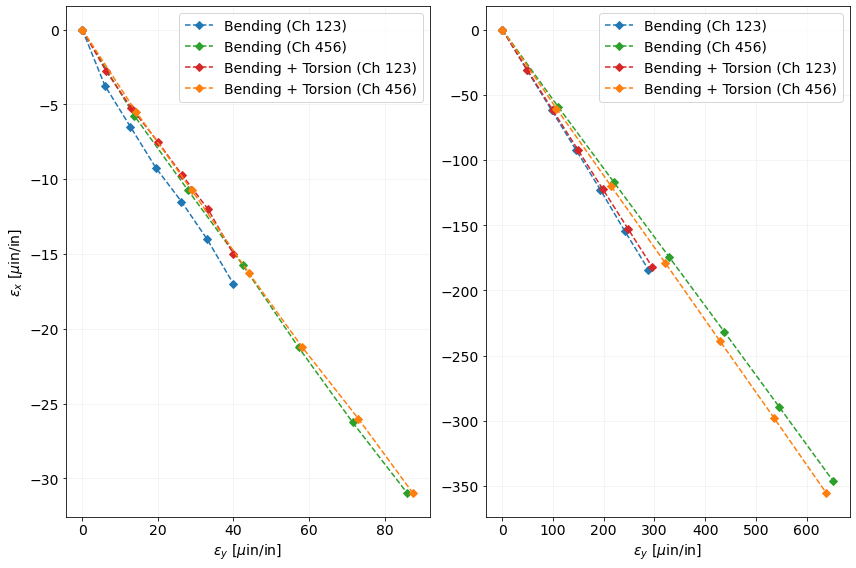

In [12]:
# plot ex vs ey
fig = plt.figure(figsize=(12,8), tight_layout=True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# ax1.plot(ex_al_bend_123, ey_al_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
# ax1.plot(ex_al_bend_456, ey_al_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
# ax1.plot(ex_al_torsion_123, ey_al_torsion_123, 'D--', color='tab:red', label=r'Torsion (Ch 123)')
# ax1.plot(ex_al_torsion_456, ey_al_torsion_456, 'D--', color='tab:orange', label=r'Torsion (Ch 456)')

# ax2.plot(ex_comp_bend_123, ey_comp_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
# ax2.plot(ex_comp_bend_456, ey_comp_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
# ax2.plot(ex_comp_torsion_123, ey_comp_torsion_123, 'D--', color='tab:red', label=r'Torsion (Ch 123)')
# ax2.plot(ex_comp_torsion_456, ey_comp_torsion_456, 'D--', color='tab:orange', label=r'Torsion (Ch 456)')

# ax1.set_xlabel( r'$\epsilon_x$ [$\mu$in/in]',fontsize=14)
# ax1.set_ylabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)

# plot with ex (transverse) on y axis and ey (axial) on x axis
ax1.plot(ey_al_bend_123, ex_al_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax1.plot(ey_al_bend_456, ex_al_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax1.plot(ey_al_torsion_123, ex_al_torsion_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax1.plot(ey_al_torsion_456, ex_al_torsion_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax2.plot(ey_comp_bend_123, ex_comp_bend_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax2.plot(ey_comp_bend_456, ex_comp_bend_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax2.plot(ey_comp_torsion_123, ex_comp_torsion_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax2.plot(ey_comp_torsion_456, ex_comp_torsion_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax1.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)
ax1.set_ylabel( r'$\epsilon_x$ [$\mu$in/in]',fontsize=14)

ax2.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax1.grid(color='0.95')
ax2.grid(color='0.95')

plt.savefig('exvsey.png')

In [13]:
# calculate slope of lines (v)
# polyfit calculates a 1 degree line of best fit, the 0th index is the slope of the line
v_al_bend_123 = -np.polyfit(ey_al_bend_123, ex_al_bend_123,1)[0]
v_al_bend_456 = -np.polyfit(ey_al_bend_456, ex_al_bend_456,1)[0]
v_al_torsion_123 = -np.polyfit(ey_al_torsion_123, ex_al_torsion_123,1)[0]
v_al_torsion_456 = -np.polyfit(ey_al_torsion_456, ex_al_torsion_456,1)[0]

v_comp_bend_123 = -np.polyfit(ey_comp_bend_123, ex_comp_bend_123,1)[0]
v_comp_bend_456 = -np.polyfit(ey_comp_bend_456, ex_comp_bend_456,1)[0]
v_comp_torsion_123 = -np.polyfit(ey_comp_torsion_123, ex_comp_torsion_123,1)[0]
v_comp_torsion_456 = -np.polyfit(ey_comp_torsion_456, ex_comp_torsion_456,1)[0]

# compute average v for each material
v_al_avg = (v_al_bend_123+v_al_bend_456+v_al_torsion_123+v_al_torsion_456)/4
v_comp_avg = (v_comp_bend_123+v_comp_bend_456+v_comp_torsion_123+v_comp_torsion_456)/4

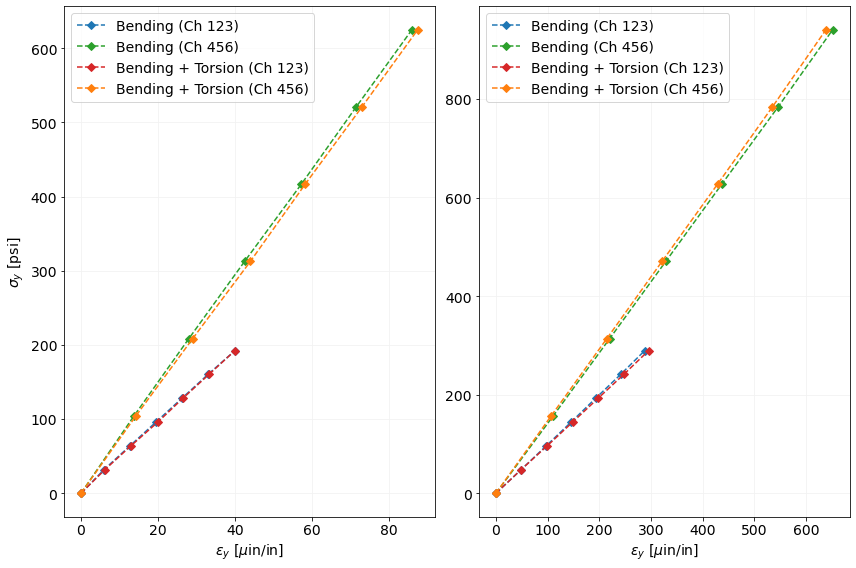

In [14]:
# plot sigma_y vs e_y
fig = plt.figure(figsize=(12,8), tight_layout=True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot with ey (strain) on x axis and sigma_y (stress) on y axis
ax1.plot(ey_al_bend_123, sigma_y_al_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax1.plot(ey_al_bend_456, sigma_y_al_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax1.plot(ey_al_torsion_123, sigma_y_al_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax1.plot(ey_al_torsion_456, sigma_y_al_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax2.plot(ey_comp_bend_123, sigma_y_comp_123, 'D--', color='tab:blue', label=r'Bending (Ch 123)')
ax2.plot(ey_comp_bend_456, sigma_y_comp_456, 'D--', color='tab:green', label=r'Bending (Ch 456)')
ax2.plot(ey_comp_torsion_123, sigma_y_comp_123, 'D--', color='tab:red', label=r'Bending + Torsion (Ch 123)')
ax2.plot(ey_comp_torsion_456, sigma_y_comp_456, 'D--', color='tab:orange', label=r'Bending + Torsion (Ch 456)')

ax1.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)
ax1.set_ylabel( r'$\sigma_y$ [psi]',fontsize=14)

ax2.set_xlabel( r'$\epsilon_y$ [$\mu$in/in]',fontsize=14)

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1.grid(color='0.95')
ax2.grid(color='0.95')

plt.savefig('ey_vs_sigma_y.png')

In [15]:
# calculate slope of lines (E)
# polyfit calculates a 1 degree line of best fit, the 0th index is the slope of the line
E_al_bend_123 = np.polyfit(ey_al_bend_123*1e-6, sigma_y_al_123,1)[0]
E_al_bend_456 = np.polyfit(ey_al_bend_456*1e-6, sigma_y_al_456,1)[0]
E_al_torsion_123 = np.polyfit(ey_al_torsion_123*1e-6, sigma_y_al_123,1)[0]
E_al_torsion_456 = np.polyfit(ey_al_torsion_456*1e-6, sigma_y_al_456,1)[0]

E_comp_bend_123 = np.polyfit(ey_comp_bend_123*1e-6, sigma_y_comp_123,1)[0]
E_comp_bend_456 = np.polyfit(ey_comp_bend_456*1e-6, sigma_y_comp_456,1)[0]
E_comp_torsion_123 = np.polyfit(ey_comp_torsion_123*1e-6, sigma_y_comp_123,1)[0]
E_comp_torsion_456 = np.polyfit(ey_comp_torsion_456*1e-6, sigma_y_comp_456,1)[0]

# compute average E for each material
E_al_avg = (E_al_bend_123+E_al_bend_456+E_al_torsion_123+E_al_torsion_456)/4
E_comp_avg = (E_comp_bend_123+E_comp_bend_456+E_comp_torsion_123+E_comp_torsion_456)/4
(E_al_bend_456+E_al_torsion_456)/2

7186083.01399339

# 8) Find My for each load. Calculate σ_ys for each loading. Plot σ_ys vs measured γ_ys to get G, the slope

In [16]:
My = 10*P

23.9101314880857


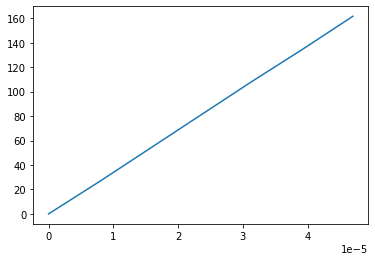

In [17]:
# Aluminum
sigma_sy_al = (2*My)/(np.pi*t_al*(r_o+r_i_al)**2)
gamma_yx_al_123 = gamma_al_torsion_123*1e-6
gamma_yx_al_456 = gamma_al_torsion_456*1e-6
slope = np.polyfit(gamma_yx_al_456, sigma_sy_al, 1)[0]
print(slope/145000)
plt.plot(gamma_yx_al_123, sigma_sy_al)

15.045035398635804


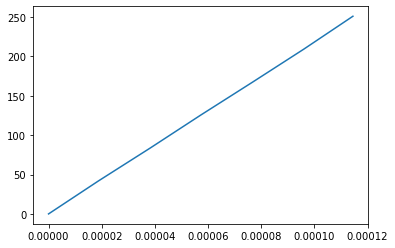

In [18]:
# Composite
sigma_sy_comp = (2*My)/(np.pi*t_comp*(r_o+r_i_comp)**2)
gamma_yx_comp_123 = gamma_comp_torsion_123*1e-6
gamma_yx_comp_456 = gamma_comp_torsion_456*1e-6
slope = np.polyfit(gamma_yx_comp_123, sigma_sy_comp, 1)[0]
print(slope/145000)
plt.plot(gamma_yx_comp_123, sigma_sy_comp)

# 12) Calculate $\sigma_x$,$\sigma_y$,$\sigma_{xy}$. Make comparison to steps (6) and (8)

In [19]:
# Expected values
E_al = 10.0E6
E_comp = 1.92E6
v_al = 0.34
v_comp = 0.51

G_al = E_al / (2*(1 + v_al))
G_comp = E_comp / (2*(1 + v_comp))

sigmax_al_bend_123 = (E_al / (1 - v_al**2)) * (ex_al_bend_123 + v_al*ey_al_bend_123) * (1.0E-6)
sigmax_al_bend_456 = (E_al / (1 - v_al**2)) * (ex_al_bend_456 + v_al*ey_al_bend_456) * (1.0E-6)

sigmax_al_torsion_123 = (E_al / (1 - v_al**2)) * (ex_al_torsion_123 + v_al*ey_al_torsion_123) * (1.0E-6)
sigmax_al_torsion_456 = (E_al / (1 - v_al**2)) * (ex_al_torsion_456 + v_al*ey_al_torsion_456) * (1.0E-6)

sigmax_comp_bend_123 = (E_comp / (1 - v_comp**2)) * (ex_comp_bend_123 + v_comp*ey_comp_bend_123) * (1.0E-6)
sigmax_comp_bend_456 = (E_comp / (1 - v_comp**2)) * (ex_comp_bend_456 + v_comp*ey_comp_bend_456) * (1.0E-6)

sigmax_comp_torsion_123 = (E_comp / (1 - v_comp**2)) * (ex_comp_torsion_123 + v_comp*ey_comp_torsion_123) * (1.0E-6)
sigmax_comp_torsion_456 = (E_comp / (1 - v_comp**2)) * (ex_comp_torsion_456 + v_comp*ey_comp_torsion_456) * (1.0E-6)

sigmay_al_bend_123 = (E_al / (1 - v_al**2)) * (ey_al_bend_123 + v_al*ex_al_bend_123) * (1.0E-6)
sigmay_al_bend_456 = (E_al / (1 - v_al**2)) * (ey_al_bend_456 + v_al*ex_al_bend_456) * (1.0E-6)

sigmay_al_torsion_123 = (E_al / (1 - v_al**2)) * (ey_al_torsion_123 + v_al*ex_al_torsion_123) * (1.0E-6)
sigmay_al_torsion_456 = (E_al / (1 - v_al**2)) * (ey_al_torsion_456 + v_al*ex_al_torsion_456) * (1.0E-6)

sigmay_comp_bend_123 = (E_comp / (1 - v_comp**2)) * (ey_comp_bend_123 + v_comp*ex_comp_bend_123) * (1.0E-6)
sigmay_comp_bend_456 = (E_comp / (1 - v_comp**2)) * (ey_comp_bend_456 + v_comp*ex_comp_bend_456) * (1.0E-6)

sigmay_comp_torsion_123 = (E_comp / (1 - v_comp**2)) * (ey_comp_torsion_123 + v_comp*ex_comp_torsion_123) * (1.0E-6)
sigmay_comp_torsion_456 = (E_comp / (1 - v_comp**2)) * (ey_comp_torsion_456 + v_comp*ex_comp_torsion_456) * (1.0E-6)

sigmaxy_al_bend_123 = G_al*gamma_al_bend_123 * (1.0E-6)
sigmaxy_al_bend_456 = G_al*gamma_al_bend_456 * (1.0E-6)

sigmaxy_al_torsion_123 = G_al*gamma_al_torsion_123 * (1.0E-6)
sigmaxy_al_torsion_456 = G_al*gamma_al_torsion_456 * (1.0E-6)

sigmaxy_comp_bend_123 = G_comp*gamma_comp_bend_123 * (1.0E-6)
sigmaxy_comp_bend_456 = G_comp*gamma_comp_bend_456 * (1.0E-6)

sigmaxy_comp_torsion_123 = G_comp*gamma_comp_torsion_123 * (1.0E-6)
sigmaxy_comp_torsion_456 = G_comp*gamma_comp_torsion_456 * (1.0E-6)

#sigma x
print(sigmax_al_bend_123)
print(sigmax_al_bend_456)
print(sigmax_al_torsion_123)
print(sigmax_al_torsion_456)
print(sigmax_comp_bend_123)
print(sigmax_comp_bend_456)
print(sigmax_comp_torsion_123)
print(sigmax_comp_torsion_456)

#sigma y
print(sigmay_al_bend_123)
print(sigmay_al_bend_456)
print(sigmay_al_torsion_123)
print(sigmay_al_torsion_456)
print(sigmay_comp_bend_123)
print(sigmay_comp_bend_456)
print(sigmay_comp_torsion_123)
print(sigmay_comp_torsion_456)

#sigma xy
print(sigmaxy_al_bend_123)
print(sigmaxy_al_bend_456)
print(sigmaxy_al_torsion_123)
print(sigmaxy_al_torsion_456)
print(sigmaxy_comp_bend_123)
print(sigmaxy_comp_bend_456)
print(sigmaxy_comp_torsion_123)
print(sigmaxy_comp_torsion_456)

[  0.         -19.33514247 -24.47987336 -29.62460425 -29.11578471
 -31.43374039 -38.44414292]
[  0.         -12.15513342 -13.90773406 -14.69923112 -20.18317503
 -21.93577567 -19.90049751]
[  0.          -7.06693804  -9.38489371  -7.9149706   -8.36725464
  -7.8584351  -15.8299412 ]
[  0.          -7.40615106 -10.06331976 -14.58616011 -16.33876074
 -13.34237901 -14.13387607]
[  0.         -16.24435735 -31.8529531  -47.14366806 -62.77821327
 -81.31260981 -96.32436816]
[  0.          -7.83024733 -12.45573726 -17.09420192 -22.0635221
 -28.31734018 -34.97986214]
[  0.         -14.94688471 -28.55737262 -41.87592918 -55.19448574
 -68.18218678 -81.208812  ]
[  0.         -15.71888093 -27.51939451 -39.01500203 -51.79510745
 -63.63454521 -76.83632923]
[  0.          53.42605156 119.17684306 184.92763455 252.6006332
 319.31252827 386.92899141]
[  0.         133.36725464 275.27137042 420.00226142 565.63772049
 707.54183627 853.23383085]
[  0.          60.09724107 126.80913614 197.30891    262.15513

In [20]:
print("Step 6 vs Step 12 Bending")
print(sigma_y_al_123, sigmay_al_bend_123)
print("---------------")
print(sigma_y_al_456, sigmay_al_bend_456)
print("---------------")
print(sigma_y_comp_123, sigmay_comp_bend_123)
print("---------------")
print(sigma_y_comp_456, sigmay_comp_bend_456)

Step 6 vs Step 12 Bending
[  0.          32.06058919  64.12117838  96.18176758 128.24235677
 160.30294596 192.36353515] [  0.          53.42605156 119.17684306 184.92763455 252.6006332
 319.31252827 386.92899141]
---------------
[  0.         104.19691487 208.39382975 312.59074462 416.7876595
 520.98457437 625.18148924] [  0.         133.36725464 275.27137042 420.00226142 565.63772049
 707.54183627 853.23383085]
---------------
[  0.          48.26772638  96.53545276 144.80317914 193.07090552
 241.33863189 289.60635827] [  0.          85.79537775 170.95499392 255.79672929 339.02311123
 422.210569   503.83457224]
---------------
[  0.         156.87011073 313.74022146 470.6103322  627.48044293
 784.35055366 941.22066439] [   0.          208.64657386  416.047574    622.48195702  828.26760373
 1034.35815651 1234.00027031]


In [21]:
def rmse(theoretical, expected):
    return np.sqrt(np.mean((theoretical-expected)**2))
print("RMSE Values between Step 6 and Step 12")
print(rmse(sigma_y_al_123, sigmay_al_bend_123))
print("---------------")
print(rmse(sigma_y_al_456, sigmay_al_bend_456))
print("---------------")
print(rmse(sigma_y_comp_123, sigmay_comp_bend_123))
print("---------------")
print(rmse(sigma_y_comp_456, sigmay_comp_bend_456))

RMSE Values between Step 6 and Step 12
113.3692973366887
---------------
134.07277940678082
---------------
130.48075530894334
---------------
179.18536691308933


In [22]:
#rmse values are kinda high so probably need to ask about this in OH